In [1]:
import os
path_folder=r'C:\Users\Borsti\Desktop\Thesis\Code\Benessen vs Roemer\rbergomi'
os.chdir(path_folder)

from datetime import datetime, timedelta
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from rbergomi import rBergomi
import pandas as pd
import pickle
import pytz
from utils import bsinv
vec_bsinv = np.vectorize(bsinv)
#% matplotlib inline

from yahoo_fin.options import get_options_chain, get_expiration_dates
from yahoo_fin.stock_info import get_live_price



In [143]:
# Read Data to be used for calculation!


def read_options_data():
    
    file_name =  "optionsData_AAPL_2021-06-25.pkl" #"optionsData_AAPL_2021-05-05.pkl"#input("Choose File Name from directory, including file extension: \n")
    
    file_to_read = open(file_name, "rb")
    loaded_dictionary = pickle.load(file_to_read)
    
    expiration_dates = [key for key in loaded_dictionary]
    
    selected_date = expiration_dates[-1] #input("Copy/Paste Desired Date from above \n")
    selected_option_type = "calls"#input("Calls or Puts \n")
    
    df = loaded_dictionary[selected_date][selected_option_type]
    #display(loaded_dictionary[selected_date][selected_option_type])
    
    return df, file_name, selected_date
df, file_name, exp_str = read_options_data()


#spot = 128.10 # 05.05.2021
spot =  133.11 # 25.6.2021 

In [144]:
###########################
# Data Prepping from File #
###########################

mid = (df["Ask"].values + df["Bid"].values)/2
strikes = df["Strike"].values
lm = np.log(spot/strikes)# Log Moneyness = log(Spot/Strike)
k_logstrike = np.log(strikes/spot) # Log Strike = log(Strike/Spot)

# Ticker
ticker = file_name.split("_")[1]

# Time of File
date_str = file_name[17:-4]
str_format1 = "%Y-%m-%d"
t_datetime = datetime.strptime(date_str, str_format1)

# Time To Expiration
str_format2 = "%B %d, %Y"
exp_datetime = datetime.strptime(exp_str, str_format2)

# Calculating Time to Expiration in Years
totsec = (exp_datetime - t_datetime).total_seconds()
years = totsec / 3600 / 24 / 365
texp = np.round(years, 3)

# Download Discount Rate for black scholes models
import pandas_datareader.data as web
start = datetime(2010, 1, 1)
end = datetime.today()
# DFF = https://fred.stlouisfed.org/series/DFF
# Effective federal funds rate
eff = web.DataReader("DFF", "fred", start, end) # in percent
disc_rate = eff.loc[date_str] * 0.01 # in decimal places


# Calculating Black Scholes Implied Volatilites
implied_vols_orig_data = vec_bsinv(mid, spot, strikes, texp)

In [145]:
df

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,AAPL230616C00060000,2021-06-25 3:23PM EDT,60.0,74.13,73.95,74.35,-0.77,-1.03%,8,2218,36.96%
1,AAPL230616C00065000,2021-06-25 11:45AM EDT,65.0,69.80,69.30,69.70,-0.60,-0.85%,11,1616,35.74%
2,AAPL230616C00070000,2021-06-25 12:26PM EDT,70.0,65.00,64.75,65.15,-0.25,-0.38%,6,440,34.73%
3,AAPL230616C00075000,2021-06-25 3:01PM EDT,75.0,60.34,60.30,60.75,-0.36,-0.59%,7,462,34.01%
4,AAPL230616C00080000,2021-06-24 1:34PM EDT,80.0,56.49,55.95,56.40,0.00,-,3,798,33.12%
5,AAPL230616C00085000,2021-06-25 3:13PM EDT,85.0,51.70,51.75,52.20,-0.55,-1.05%,4,403,32.38%
6,AAPL230616C00090000,2021-06-25 3:43PM EDT,90.0,47.60,47.70,48.10,-0.32,-0.67%,3,586,31.60%
7,AAPL230616C00095000,2021-06-24 10:23AM EDT,95.0,44.40,43.85,44.25,-0.30,-0.67%,5,225,31.11%
8,AAPL230616C00100000,2021-06-25 3:29PM EDT,100.0,40.20,40.25,40.65,-0.40,-0.99%,29,8033,30.81%
9,AAPL230616C00105000,2021-06-25 10:56AM EDT,105.0,37.15,36.70,37.10,-0.45,-1.20%,102,603,30.27%


In [ ]:
# Finding Location (Strike & ImpVol) of
##################################################################################
### ContractName          Strike   LastPrice   Bid    Ask    Implied Volatility ##
### AAPL230616C00060000   60.0     74.13       73.95  74.35  36.96%             ##
##################################################################################

In [146]:
print("mid:",mid[0])
print("strike:", strikes[0])
print("log moneyness:", lm[0])
print("log strike", k_logstrike[0])
print("spot:", spot)
print("texp:", texp)
print("implied_vola:", vec_bsinv(mid[0], spot, strikes[0], texp, disc_rate))

mid: 74.15
strike: 60.0
log moneyness: 0.7968312918368272
log strike -0.7968312918368272
spot: 133.11
texp: 1.975
implied_vola: [0.35650162]


In [ ]:
# Finding Location (Strike & ImpVol) of
##################################################################################
### ContractName          Strike   LastPrice   Bid    Ask    Implied Volatility ##
### AAPL230616C00060000   260.0     2.45       2.30   2.47   36.96%             ##
##################################################################################

In [147]:
print("mid:",mid[-1])
print("strike:", strikes[-1])
print("log moneyness:", lm[-1])
print("log strike", k_logstrike[-1])
print("spot:", spot)
print("texp:", texp)
print("implied_vola:", vec_bsinv(mid[-1], spot, strikes[-1], texp, disc_rate))

mid: 2.385
strike: 260.0
log moneyness: -0.6695057769565999
log strike 0.6695057769565997
spot: 133.11
texp: 1.975
implied_vola: [0.31744619]


Text(0.5, 0.98, ' AAPL, $ \\tau=1.975, Spot=133.11 $')

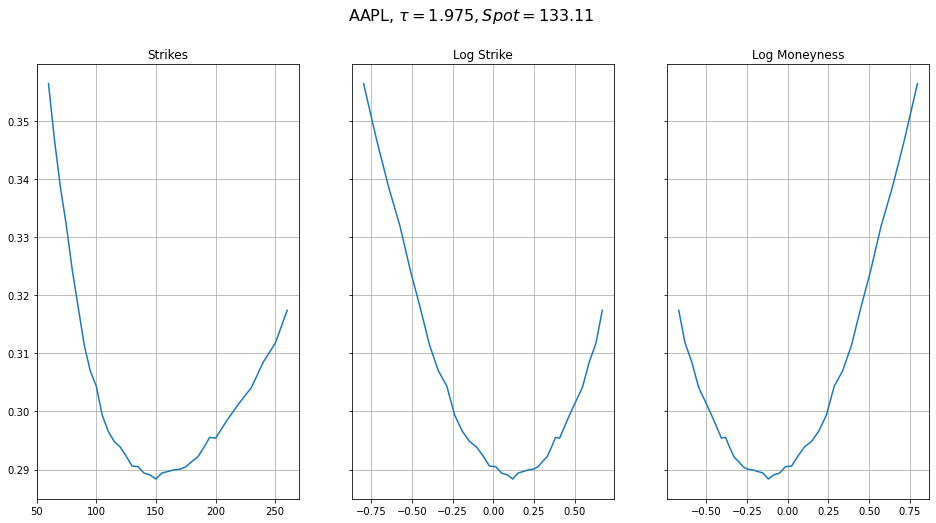

In [148]:
# Plotting Black Scholes Volatility Skew

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8),
                             sharey=True)

ax1.plot(strikes, implied_vols_orig_data)
ax2.plot(k_logstrike, implied_vols_orig_data)
ax3.plot(lm, implied_vols_orig_data)
ax1.grid()
ax2.grid()
ax3.grid()
ax1.set_title('Strikes')
ax2.set_title('Log Strike')
ax3.set_title('Log Moneyness')
title = r' AAPL, $ \tau=%.3f, Spot=%.2f $'
plt.suptitle(title%(texp, spot), fontsize=16)

In [149]:
def clean_contracts(df, exp_date_str):
    df2 = df.copy()
    
    str_format2 = "%B %d, %Y"
    exp_datetime = datetime.strptime(exp_date_str, str_format2)
    
    # calculate needed data
    mid = (df2["Ask"] + df2["Bid"])/2
    spread = df2["Ask"] - df2["Bid"]
    liquidity = spread/mid
    df2["Mid"] = mid
    df2["Spread"] = spread
    df2["Liquidity"] = liquidity
    df2["Keep"] = True

    # Translate reported date into python timestamp
    dt_str_list = [x.split(" ")[0] for x in df2["Last Trade Date"]]
    listasts = pd.DatetimeIndex(dt_str_list)
    df2["Last Trade Date"] = listasts
    
    # Iterate through the df
    for index, row in df2.iterrows():

        # Identify too old trades/quotes
        date = row["Last Trade Date"]
        lasttrade_delta = (t_datetime - date).days
        if lasttrade_delta >= 1: # if last trade is older than 1 day

            delta_percent = lasttrade_delta/(exp_datetime - date).days
            #print("need to check: ", lasttrade_delta)
            #print("delta: ", delta_percent)
            if delta_percent > 0.05:
                keep_var = False
            else:
                keep_var = True

        else:
            keep_var = True
            
        if keep_var == True:
            # Identify illiquid option contracts, for all that have been traded recently
            
            liquidity_i = row["Liquidity"]
            #print("liquidity: ", liquidity_i)
            if liquidity_i > 0.05:
                keep_var = False
            else:
                keep_var = True
                
        #print("Keep?", keep_var)
        df2.loc[index,"Keep"] = keep_var
        

    df_clean_test = df2
    #display(df_clean_test)

    df_clean_test = df_clean_test[df_clean_test["Keep"]==True]
    #display(df_clean_test) 
    
    cleaned_num = len(df) - len(df_clean_test)
    #print("Number of deleted contracts: ", cleaned_num)
    return df_clean_test


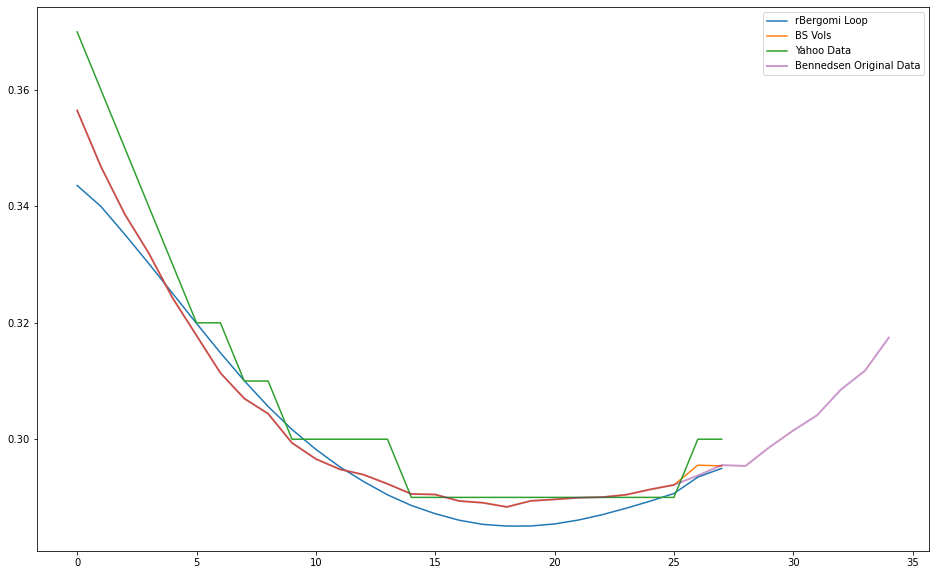

In [150]:



# Reading in Data
file_name =  "optionsData_AAPL_2021-06-25.pkl" #"optionsData_AAPL_2021-05-05.pkl"#input("Choose File Name from directory, including file extension: \n")

file_to_read = open(file_name, "rb")
loaded_dictionary = pickle.load(file_to_read)

expiration_dates = [key for key in loaded_dictionary]

selected_date = expiration_dates[-1] #input("Copy/Paste Desired Date from above \n")
selected_option_type = "calls"#input("Calls or Puts \n")

# Calculating all expirations of option chain in years
# Time of File
date_str = file_name[17:-4]
str_format1 = "%Y-%m-%d"
t_datetime = datetime.strptime(date_str, str_format1)

texp_list = []
for i, exp_string in enumerate(expiration_dates):
    
    # Time To Expiration
    str_format2 = "%B %d, %Y"
    exp_datetime = datetime.strptime(exp_string, str_format2)
    
    # Calculating Time to Expiration in Years
    totsec = (exp_datetime - t_datetime).total_seconds()
    years = totsec / 3600 / 24 / 365
    texp = np.round(years, 3)
    texp_list.append(texp)

# rBergomi Parameters
alpha = -0.46
eta = 2
rho = -0.22
xi = 0.323**2
    
    
def rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi):
    
    # to ensure computation works, we have to give greater granularity for very short durations.
    # However, setting finer granularity affects shape of smile significantly. What is the explanation?
    if texp < 0.01:
        steps_year = 100000
    else:
        steps_year = 100

    # Defining the Fractional Brownian Process and Resulting Price Process
    np.random.seed(4)
    rB = rBergomi(n = steps_year, N = 30000, T = texp, a = alpha)
    dW1 = rB.dW1()
    dW2 = rB.dW2()
    Y = rB.Y(dW1)
    dB = rB.dB(dW1, dW2, rho = rho)
    V = rB.V(Y, xi = xi, eta = eta)
    S = rB.S(V, dB)
    
    # rBergomi Implied Volatilities and Call Prices
    ST = S[:,-1][:,np.newaxis]
    ST = ST*spot
    K = strikes #(np.exp(k)*spot)[np.newaxis,:]
    call_payoffs = np.maximum(ST - K,0)
    call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
    implied_vols_ben_theor = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T, disc_rate)
    
    return implied_vols_ben_theor, call_prices

def market_volas(spot, mid, strikes, texp):
    
    try:
        market_vols = vec_bsinv(mid, spot, np.transpose(strikes), texp, disc_rate)
    except Exception as e:
        impvol_test = []
        for i, mid_val in enumerate(mid):
            try:
                impvol_test.append(vec_bsinv(mid_val, spot, strikes[i], texp, disc_rate))
            except Exception as e:
                impvol_test.append(1.e-19)
        market_vols = impvol_test
     
    market_vols = list(np.squeeze(market_vols))
    
    return market_vols
    

# Calculating Volatilities
call_prices_list = []
vols_list = []
market_list=[]
yahoo_ivs_list = []
# loop through all maturitites in years
for i, texp_years in enumerate(texp_list):
    
    # index into all-data-dictionary
    date = expiration_dates[i]
    df3 = loaded_dictionary[date][selected_option_type]
    df = clean_contracts(df3, date)
    
    # get needed market data (mid, strike)
    mid = (df["Ask"].values + df["Bid"].values)/2
    strikes = df["Strike"].values
    
    # Compute market volas and store in list
    market_vols = market_volas(spot, mid, strikes, texp_years)
    market_list = [*market_list, *market_vols]
    
    # compute rbegomi volas and store in list
    vols, call_prices = rbergomi_s(spot, strikes, texp_years, alpha, eta, rho, xi)
    vols = list(np.squeeze(vols))
    call_prices = list(np.squeeze(call_prices))
    vols_list = [*vols_list, *vols]
    call_prices_list = [*call_prices_list, *call_prices]
    
    yahoo_ivs = [np.round(float(x[:-1])*0.01,2) for x in df["Implied Volatility"]]
    yahoo_ivs_list = [*yahoo_ivs_list, *yahoo_ivs]





#alpha = -0.46
#eta = 2
#rho = -0.22
#xi = 0.323**2
#vols_list = []
#for i, texp in enumerate(texp_list):
#    vols = rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi)
#    vols = list(np.squeeze(vols))
#    
#    vols_list = [*vols_list, *vols]
    
    
    
plt.figure(figsize=(16,10))
plt.plot(vols_list[-len(strikes):], label="rBergomi Loop")
plt.plot(market_list[-len(strikes):], label="BS Vols")
plt.plot(yahoo_ivs_list[-len(strikes):], label="Yahoo Data")
plt.plot(implied_vols_orig_data, lw=2, alpha=0.4, c="purple", label="Bennedsen Original Data")
#plt.plot(implied_vols_ben_theor, lw=2, alpha=0.2, c="orange", label="Bennedsen rBergomi")
plt.legend()

In [15]:
#{"MarketBS": market_list, "YahooBS": yahoo_ivs_list, "rBergomi": vols_list}

In [17]:
pd.DataFrame({"MarketBS": market_list, "YahooBS": yahoo_ivs_list, "rBergomi": vols_list}).corr()

,MarketBS,YahooBS,rBergomi
MarketBS,1.000000,0.998477,0.836446
YahooBS,0.998477,1.000000,0.834053
rBergomi,0.836446,0.834053,1.000000


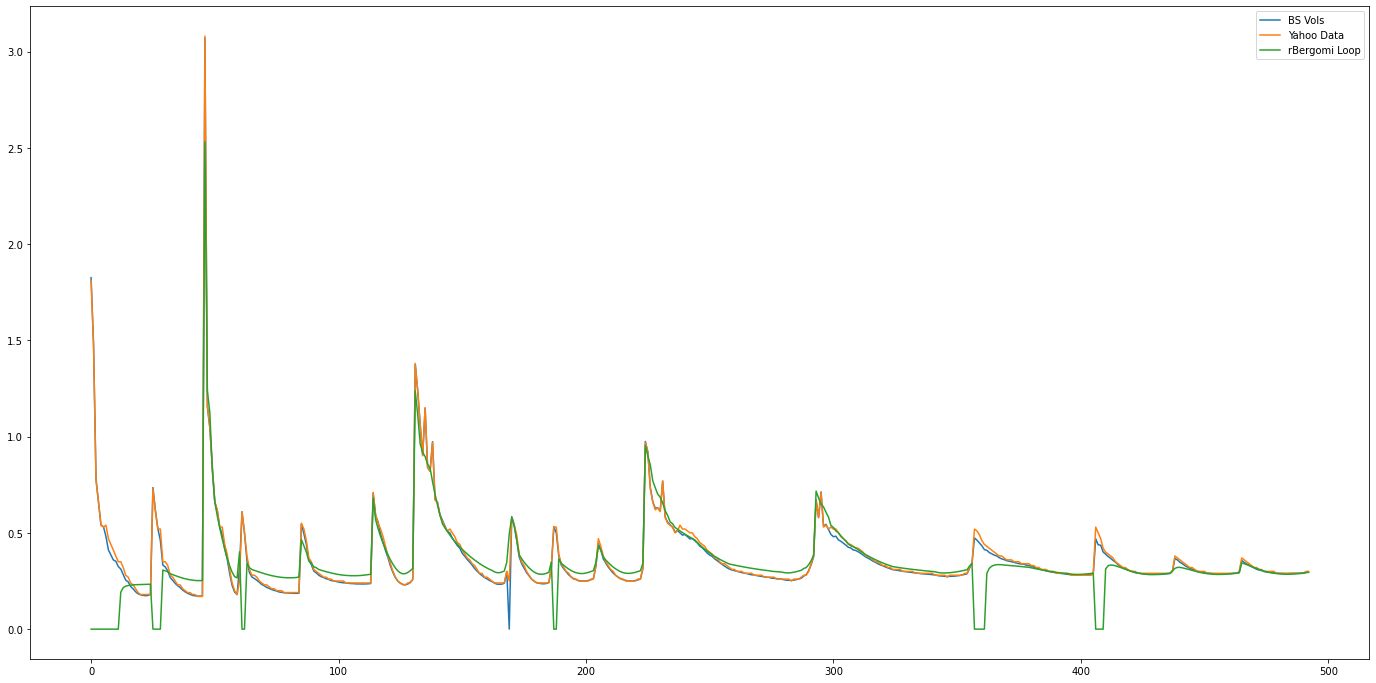

In [151]:
plt.figure(figsize=(24,12))

plt.plot(market_list, label="BS Vols")
plt.plot(yahoo_ivs_list, label="Yahoo Data")
plt.plot(vols_list, label="rBergomi Loop")
plt.legend()

In [91]:
def objective_fun(params):
    alpha, eta, rho, xi = params
    # Calculating Volatilities
    vols_list = []
    market_list=[]
    yahoo_ivs_list = []
    spot=133.11
    # loop through all maturitites in years
    for i, texp_years in enumerate(texp_list):

        # index into all-data-dictionary
        date = expiration_dates[i]
        df3 = loaded_dictionary[date][selected_option_type]
        df = clean_contracts(df3, date)

        # get needed market data (mid, strike)
        mid = (df["Ask"].values + df["Bid"].values)/2
        strikes = df["Strike"].values

        # Compute market volas and store in list
        market_vols = market_volas(spot, mid, strikes, texp_years)
        market_list = [*market_list, *market_vols]

        # compute rbegomi volas and store in list
        vols = rbergomi_s(spot, strikes, texp_years, alpha, eta, rho, xi)
        vols = list(np.squeeze(vols))
        vols_list = [*vols_list, *vols]

        yahoo_ivs = [np.round(float(x[:-1])*0.01,2) for x in df["Implied Volatility"]]
        yahoo_ivs_list = [*yahoo_ivs_list, *yahoo_ivs]
        
    MSE = np.mean((np.power(np.array(vols_list) - np.array(yahoo_ivs_list), 2)))
    print("iter done")
    return MSE

def objective_fun2(params):
    alpha, eta, rho, xi = params
    vals = rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi)
    
    MSE = np.mean((np.power(np.array(vols_list) - np.array(yahoo_ivs_list), 2)))
    return MSE
    

init = np.array([alpha, eta, rho, xi])

Result = minimize(objective_fun, x0=init, method='nelder-mead', tol=1E-10, options={"maxiter":50})

iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done
iter done


KeyboardInterrupt: 

In [97]:
objective_fun(init)

iter done


0.014313705326615436

In [19]:
from scipy.optimize import minimize
# objective function
def objective(x):
    return x[0]**2.0 + x[1]**2.0

# define range for input
r_min, r_max = -5.0, 5.0
# define the starting point as a random sample from the domain
pt = r_min + np.random.rand(2) * (r_max - r_min)


# perform the search
result = minimize(objective, pt, method='nelder-mead')

In [73]:
    #I=scipy.optimize.minimize(CostFunc,x0=init,args=i,method='L-BFGS-B',jac=Jacobian,tol=1E-10,options={"maxiter":5000})


1 2 3 4


In [86]:
np.mean((np.power(np.array(vols_list) - np.array(yahoo_ivs_list), 2)))

0.014313705326615436

In [64]:
init2=np.zeros(4)
init2, init

(array([0., 0., 0., 0.]), array([-0.46    ,  2.      , -0.22    ,  0.104329]))

In [ ]:
# Calculating all expirations of option chain in years
# Time of File
date_str = file_name[17:-4]
str_format1 = "%Y-%m-%d"
t_datetime = datetime.strptime(date_str, str_format1)

texp_list = []
for i, exp_string in enumerate(expiration_dates):
    
    # Time To Expiration
    str_format2 = "%B %d, %Y"
    exp_datetime = datetime.strptime(exp_string, str_format2)
    
    # Calculating Time to Expiration in Years
    totsec = (exp_datetime - t_datetime).total_seconds()
    years = totsec / 3600 / 24 / 365
    texp = np.round(years, 3)
    texp_list.append(texp)



def rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi):
    
    # to ensure computation works, we have to give greater granularity for very short durations.
    # However, setting finer granularity affects shape of smile significantly. What is the explanation?
    if texp < 0.01:
        steps_year = 100000
    else:
        steps_year = 100

    # Defining the Fractional Brownian Process and Resulting Price Process
    np.random.seed(4)
    rB = rBergomi(n = steps_year, N = 30000, T = texp, a = alpha)
    dW1 = rB.dW1()
    dW2 = rB.dW2()
    Y = rB.Y(dW1)
    dB = rB.dB(dW1, dW2, rho = rho)
    V = rB.V(Y, xi = xi, eta = eta)
    S = rB.S(V, dB)
    
    # rBergomi Implied Volatilities and Call Prices
    ST = S[:,-1][:,np.newaxis]
    ST = ST*spot
    K = strikes #(np.exp(k)*spot)[np.newaxis,:]
    call_payoffs = np.maximum(ST - K,0)
    call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
    implied_vols_ben_theor = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T, disc_rate)
    
    return implied_vols_ben_theor


alpha = -0.46
eta = 2
rho = -0.22
xi = 0.323**2
vols_list = []
for i, texp in enumerate(texp_list):
    vols = rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi)
    vols = list(np.squeeze(vols))
    
    vols_list = [*vols_list, *vols]

In [ ]:
test12345=rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi)

In [ ]:
#list(np.squeeze(test12345))

In [ ]:
alpha = -0.46
eta = 2
rho = -0.22
xi = 0.323**2
vols_list = []
for i, texp in enumerate(texp_list):
    vols = rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi)
    vols = list(np.squeeze(vols))
    
    vols_list = [*vols_list, *vols]

In [ ]:
float(df["Implied Volatility"][0][:-1])

In [ ]:
yahoo_ivs = [np.round(float(x[:-1])*0.01,2) for x in df["Implied Volatility"]]


In [ ]:
loaded_dictionary[expiration_dates[6]]["calls"]["Last Trade Date"]

In [ ]:
"2021-05-21 11:54AM EDT".split(" ")[0]

In [ ]:
dt_str_list = [x.split(" ")[0] for x in loaded_dictionary[expiration_dates[0]]["calls"]["Last Trade Date"]]
dt_str_list
listasdet = pd.DatetimIndex(dt_str_list)

In [ ]:
expiration_dates[0]

In [ ]:
if lasttrade_delta >= 1day:
    delta_percent = (expiration_dates[0] - dt_str_list)/expiration_dates[0]
    
    if delta_percent > 0.05:
        keep = False
    else:
        keep = True
else:
    keep = True
    
dfnew = df[df[keep=True]]

In [ ]:
loaded_dictionary[expiration_dates[0]]["calls"]["Last Trade Date"] = pd.DatetimeIndex(dt_str_list)

In [ ]:
loaded_dictionary[expiration_dates[0]]["calls"]["Keep"] = True

In [ ]:
loaded_dictionary[expiration_dates[0]]["calls"]["Last Trade Date"][0]

In [ ]:
t_datetime, loaded_dictionary[expiration_dates[0]]["calls"]["Last Trade Date"][0]

In [ ]:
exp_datetime

In [ ]:
lasttrade_delta/(exp_datetime - date).days#/ #exp_datetime

In [ ]:
loaded_dictionary[expiration_dates[0]]["calls"].loc[i,"Keep"]

In [ ]:
loaded_dictionary[expiration_dates[0]]["calls"].tail()

In [ ]:
spread = (loaded_dictionary[expiration_dates[0]]["calls"]["Ask"] - loaded_dictionary[expiration_dates[0]]["calls"]["Bid"]) 
mid = ((loaded_dictionary[expiration_dates[0]]["calls"]["Ask"] + loaded_dictionary[expiration_dates[0]]["calls"]["Bid"])/2)
liquidity = spread/mid

In [ ]:
liquidity

In [ ]:
5/1000

In [ ]:
for i, date in enumerate(loaded_dictionary[expiration_dates[0]]["calls"].iloc[:,1]):

In [ ]:
for index, row in df_marks.iterrows():

In [ ]:
exp_datetime

In [ ]:
expiration_dates

In [ ]:
str_format2 = "%B %d, %Y"
exp_datetime = datetime.strptime(exp_str, str_format2)

In [ ]:
loaded_dictionary[expiration_dates[0]]["calls"].at[0,"Keep"] = "hahshas"

In [ ]:
loaded_dictionary[expiration_dates[0]]["calls"].at[0,"Keep"]

In [ ]:
#df = loaded_dictionary[expiration_dates[0]]["calls"]

def clean_contracts(df, exp_date_str):
    df2 = df.copy()
    
    str_format2 = "%B %d, %Y"
    exp_datetime = datetime.strptime(exp_date_str, str_format2)
    
    # calculate needed data
    mid = (df2["Ask"] + df2["Bid"])/2
    spread = df2["Ask"] - df2["Bid"]
    liquidity = spread/mid
    df2["Mid"] = mid
    df2["Spread"] = spread
    df2["Liquidity"] = liquidity
    df2["Keep"] = True

    # Translate reported date into python timestamp
    dt_str_list = [x.split(" ")[0] for x in df2["Last Trade Date"]]
    listasts = pd.DatetimeIndex(dt_str_list)
    df2["Last Trade Date"] = listasts
    
    # Iterate through the df
    for index, row in df2.iterrows():

        # Identify too old trades/quotes
        date = row["Last Trade Date"]
        lasttrade_delta = (t_datetime - date).days
        if lasttrade_delta >= 1: # if last trade is older than 1 day

            delta_percent = lasttrade_delta/(exp_datetime - date).days
            #print("need to check: ", lasttrade_delta)
            #print("delta: ", delta_percent)
            if delta_percent > 0.05:
                keep_var = False
            else:
                keep_var = True

        else:
            keep_var = True
            
        if keep_var == True:
            # Identify illiquid option contracts, for all that have been traded recently
            
            liquidity_i = row["Liquidity"]
            #print("liquidity: ", liquidity_i)
            if liquidity_i > 0.05:
                keep_var = False
            else:
                keep_var = True
                
        #print("Keep?", keep_var)
        df2.loc[index,"Keep"] = keep_var
        

    df_clean_test = df2
    #display(df_clean_test)

    df_clean_test = df_clean_test[df_clean_test["Keep"]==True]
    #display(df_clean_test) 
    
    cleaned_num = len(df) - len(df_clean_test)
    print("Number of deleted contracts: ", cleaned_num)
    return df_clean_test

clean_contracts(loaded_dictionary[expiration_dates[5]]["calls"], expiration_dates[5])

In [ ]:
expiration_dates[3]

In [ ]:
mid = ((loaded_dictionary[expiration_dates[0]]["calls"]["Ask"] + loaded_dictionary[expiration_dates[0]]["calls"]["Bid"])/2)
spread = (loaded_dictionary[expiration_dates[0]]["calls"]["Ask"] - loaded_dictionary[expiration_dates[0]]["calls"]["Bid"]) 
liquidity = spread/mid
loaded_dictionary[expiration_dates[0]]["calls"]["Mid"] = mid
loaded_dictionary[expiration_dates[0]]["calls"]["Spread"] = spread
loaded_dictionary[expiration_dates[0]]["calls"]["Liquidity"] = liquidity


dt_str_list = [x.split(" ")[0] for x in loaded_dictionary[expiration_dates[0]]["calls"]["Last Trade Date"]]
dt_str_list
listasdt = pd.DatetimeIndex(dt_str_list)
loaded_dictionary[expiration_dates[0]]["calls"]["Last Trade Date"] = listasdt


for i, date in enumerate(loaded_dictionary[expiration_dates[0]]["calls"].iloc[:,1]):
    lasttrade_delta = (t_datetime - date).days
    #print(t_datetime - date)
    
    if lasttrade_delta >= 1: # if last trade is older than 1 day
        
        
        delta_percent = lasttrade_delta/(exp_datetime - date).days
        print("need to check: ", lasttrade_delta)
        print("delta: ", delta_percent)
        if delta_percent > 0.025:
            keep_var = False
        else:
            keep_var = True
        
    else:
        keep_var = True
    
    loaded_dictionary[expiration_dates[0]]["calls"].loc[i,"Keep"] = keep_var
df_clean_test = loaded_dictionary[expiration_dates[0]]["calls"]
display(df_clean_test)

df_clean_test = df_clean_test[df_clean_test["Keep"]==True]
display(df_clean_test)



In [175]:
rB2 = rBergomi(n = 100, N = 1, T = 1, a = -0.489990000001)
dW1_1 = rB2.dW1()
dW2_1 = rB2.dW2()
Y_1 = rB2.Y(dW1_1)
dB_1 = rB2.dB(dW1_1, dW2_1, rho = -0)
V_1 = rB2.V(Y_1, xi = 0.235**2, eta = 1.9)
S_1 = rB2.S(V_1, dB_1)

In [176]:
rB3 = rBergomi(n = 100, N = 1, T = 1, a = -0.00000000001)
dW1_2 = rB3.dW1()
dW2_2 = rB3.dW2()
Y_2 = rB3.Y(dW1_2)
dB_2 = rB3.dB(dW1_2, dW2_2, rho = -0.9)
V_2 = rB3.V(Y_2, xi = 0.235**2, eta = 1.9)
S_2 = rB3.S(V_2, dB_2)

Text(0, 0.5, '$S_{t}$')

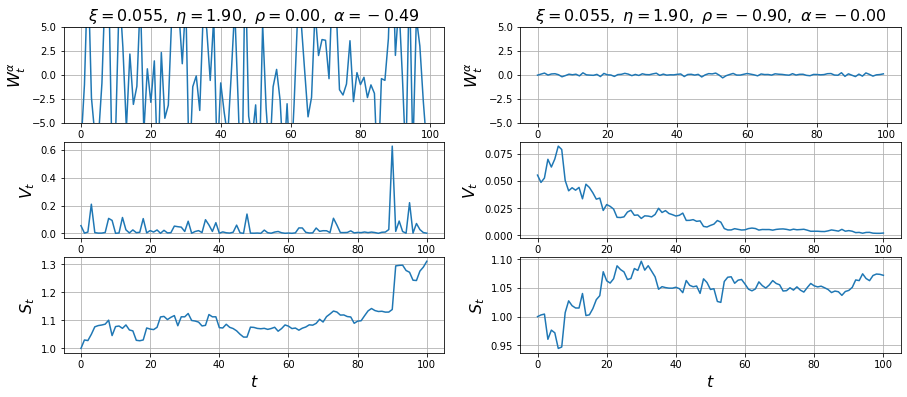

In [186]:
from matplotlib.pyplot import figure
plot, axes = plt.subplots(3,2, figsize=(15, 6))
#axes.figure(figsize=(15, 6), dpi=80)
#axes.plot(k_logstrike,implied_vols_ben_theor, lw=2, c="orange", label="rBergomi")
#axes.plot(k_logstrike, implied_vols_orig_data, lw=2, alpha=0.6, c="purple", label="Original Data")
#axes.plot(k_logstrike,bid_iv_array, "*", c="r", label = "Bid")
#axes.plot(k_logstrike,ask_iv_array, "*", c="b", label="Ask")
##axes.plot(k_obs[idxT],iv_fit[idxT],'--g',label='Fit')
#axes.legend()
#axes.set_xlabel(r'log-strike $k=log(K/F)$', fontsize=16)
#axes.set_ylabel(r'$\sigma_{BS}(k,t=%.2f)$'%rB.T, fontsize=16)
#title = r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'

#W_t
#axes.plot(dW2[0])
data=np.squeeze(dW1_1[0][:,1])
axes[0,0].plot(data)
axes[0,0].set_ylim([-5,5])
title = r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'
axes[0,0].set_title(title%(rB2.xi, rB2.eta, rB2.rho, rB2.a), fontsize=16)
axes[0,0].grid(True)
axes[0,0].set_xlabel('$t$', fontsize=16)
axes[0,0].set_ylabel(r'$W^{\alpha}_{t}$', fontsize=16)

# V_t
axes[1,0].plot(np.squeeze(V_1))
#axes[1,0].set_ylim([-5,5])
title = r'$\alpha=%.2f $'
#axes[1,0].set_title(title%(rB3.a), fontsize=16)
axes[1,0].grid(True)
#axes[1,0].set_xlabel('$t$', fontsize=16)
axes[1,0].set_ylabel(r'$V_{t}$', fontsize=16)

#S_t
axes[2,0].plot(np.squeeze(S_1))
#axes[2,0].set_ylim([-5,5])
title = r'$\alpha=%.2f $'
#axes[2,0].set_title(title%(rB2.a), fontsize=16)
axes[2,0].grid(True)
axes[2,0].set_xlabel('$t$', fontsize=16)
axes[2,0].set_ylabel(r'$S_{t}$', fontsize=16)

# W_t
#axes.plot(dW2[0])
data2=np.squeeze(dW1_2[0][:,1])
axes[0,1].plot(data2)
axes[0,1].set_ylim([-5,5])
title = r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'
axes[0,1].set_title(title%(rB3.xi, rB3.eta, rB3.rho, rB3.a), fontsize=16)
axes[0,1].grid(True)
axes[0,1].set_xlabel('$t$', fontsize=16)
axes[0,1].set_ylabel(r'$W^{\alpha}_{t}$', fontsize=16)


# V_t
axes[1,1].plot(np.squeeze(V_2))
#axes[1,1].set_ylim([-5,5])
title = r'$\alpha=%.2f $'
#axes[1,1].set_title(title%(rB3.a), fontsize=16)
axes[1,1].grid(True)
#axes[1,1].set_xlabel('$t$', fontsize=16)
axes[1,1].set_ylabel(r'$V_{t}$', fontsize=16)

# S_t
axes[2,1].plot(np.squeeze(S_2))
#axes[2,1].set_ylim([-5,5])
title = r'$\alpha=%.2f $'
#axes[2,1].set_title(title%(rB3.a), fontsize=16)
axes[2,1].grid(True)
axes[2,1].set_xlabel('$t$', fontsize=16)
axes[2,1].set_ylabel(r'$S_{t}$', fontsize=16)

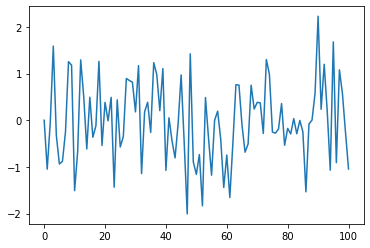

In [188]:
plt.plot(np.squeeze(Y_1))

In [192]:
len(np.arange(-0.5, 0.51, 0.01))

101

In [190]:
np.shape(dW2_2)

(1, 100)

In [54]:
np.squeeze(dW1[0][:,0])

array([ 0.01069748,  0.20118976, -0.02334489, -0.06492727,  0.11691322,
        0.04075388,  0.22070199,  0.00357704, -0.22404515, -0.01313575,
        0.04907423,  0.05678084,  0.14738778,  0.03377955,  0.05424024,
       -0.01476808,  0.11954699,  0.16397545, -0.18827819,  0.05507011,
       -0.06280755, -0.13397732,  0.03281429, -0.02400333, -0.03294605,
        0.10150741,  0.0737704 , -0.0346771 ,  0.01354545, -0.03877932,
       -0.03208382,  0.09780671,  0.04787261, -0.07260319, -0.08587661,
        0.04786237, -0.29966915, -0.18982395,  0.03548638, -0.0781784 ,
        0.0348377 , -0.06943967,  0.0185099 , -0.02498039,  0.0241963 ,
       -0.00394975, -0.08535086, -0.11985582,  0.02813127,  0.04725631,
        0.04334846,  0.06595277,  0.08699666, -0.06034157,  0.08638161,
        0.1490275 , -0.01530009, -0.20918652, -0.05106142, -0.04466452,
        0.10786417,  0.0974898 ,  0.18333068, -0.07777959,  0.00088909,
       -0.0767333 ,  0.0938305 , -0.03245666,  0.06814879,  0.04

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(vols_list[-len(strikes):], label="rBergomi Loop")
plt.plot(market_list[-len(strikes):], label="BS Vols")
plt.plot(yahoo_ivs_list[-len(strikes):], label="Yahoo Data")
#plt.plot(implied_vols_orig_data, lw=2, alpha=0.4, c="purple", label="Bennedsen Original Data")
plt.plot(implied_vols_ben_theor, lw=2, alpha=0.8, c="black", label="Bennedsen rBergomi")
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (35,) and (28, 1)

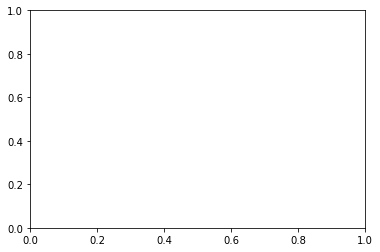

In [152]:
################
  # BENEDSSEN #
################

# Standard Parameters
#T = 1.0
#a = -0.43
#rho = -0.9
#xi = 0.235**2
#eta = 1.9


# Defining Parameters for Fractional Brownian Process
# 26.06.2021
a_2 = -0.46
rho_2 = -0.22
xi_2 = 0.323**2
eta_2 = 2

# 05.05.2021
#a_2 = -0.465
#rho_2 = -0.105
#xi_2 = 0.327**2
#eta_2 = 1.87


# to ensure computation works, we have to give greater granularity for very short durations.
# However, setting finer granularity affects shape of smile significantly. What is the explanation?
if texp < 0.01:
    steps_year = 100000
else:
    steps_year = 100

# Defining the Fractional Brownian Process and Resulting Price Process
np.random.seed(4)
rB = rBergomi(n = steps_year, N = 30000, T = texp, a = a_2)
dW1 = rB.dW1()
dW2 = rB.dW2()
Y = rB.Y(dW1)
dB = rB.dB(dW1, dW2, rho = rho_2)
V = rB.V(Y, xi = xi_2, eta = eta_2)
S = rB.S(V, dB)

# rBergomi Implied Volatilities and Call Prices
ST = S[:,-1][:,np.newaxis]
ST = ST*spot
K = strikes #(np.exp(k)*spot)[np.newaxis,:]
call_payoffs = np.maximum(ST - K,0)
call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
implied_vols_ben_theor = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T, disc_rate)

# True Data
bid_iv_array = vec_bsinv(df["Bid"].values, spot, df["Strike"].values, rB.T, disc_rate)
ask_iv_array = vec_bsinv(df["Ask"].values, spot, df["Strike"].values, rB.T, disc_rate)

# Graphing
plot, axes = plt.subplots()
axes.plot(k_logstrike,implied_vols_ben_theor, lw=2, c="orange", label="rBergomi")
axes.plot(k_logstrike, implied_vols_orig_data, lw=2, alpha=0.6, c="purple", label="Original Data")
axes.plot(k_logstrike,bid_iv_array, "*", c="r", label = "Bid")
axes.plot(k_logstrike,ask_iv_array, "*", c="b", label="Ask")
#axes.plot(k_logstrike,test123, "*", c="g", label="test")
#axes.plot(k_obs[idxT],iv_fit[idxT],'--g',label='Fit')
#xes.plot(k_logstrike,vols_list[-len(strikes):])
#axes.plot(k_logstrike,market_list[-len(strikes):])
axes.legend()
axes.set_xlabel(r'log-strike $k=log(K/F)$', fontsize=16)
axes.set_ylabel(r'$\sigma_{BS}(k,t=%.2f)$'%rB.T, fontsize=16)
title = r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'
axes.set_title(title%(rB.xi, rB.eta, rB.rho, rB.a), fontsize=16)
plt.grid(True)

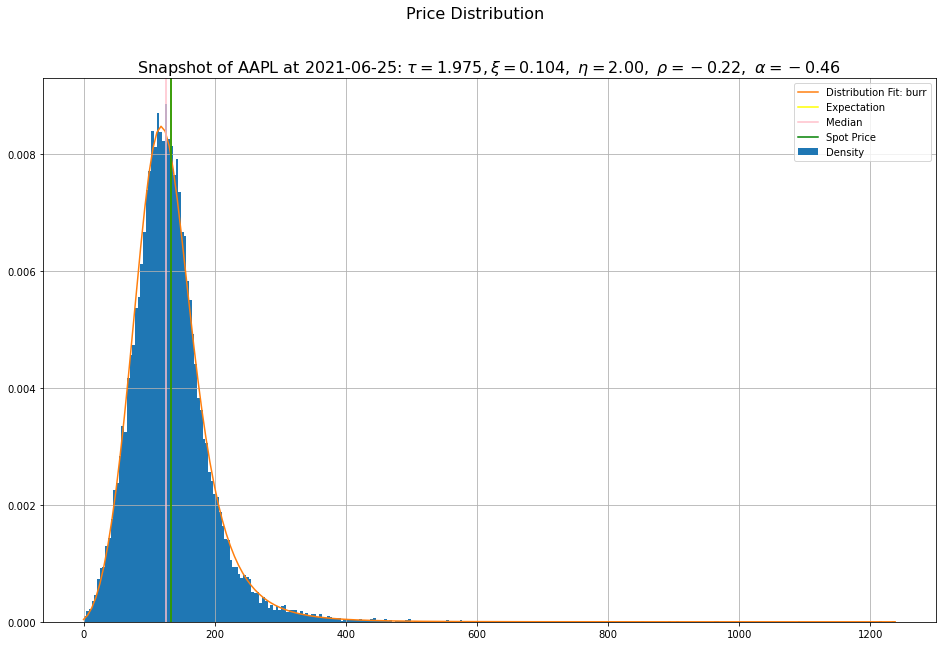

In [114]:
import scipy.stats as st
import warnings

# DEFINING PORTFOLIO DATA
data = np.squeeze(ST)#portf_log_return['Portfolio']


#GET HISTOGRAM OF PORTFOLIO DATA
                                                    # COMMENTS:
y,_ = np.histogram(data, bins=200, density=True)    #  y[1] is the frequency of the bin x[1]
x = np.linspace(data.min()                          # thus for 200 frequencies y, I have 200-1 bins x!
                , data.max(), 200)                  # https://www.tutorialspoint.com/numpy/ ... 
                                                    #  ... numpy_histogram_using_matplotlib
                                                    # We are defining x anew, because the value from 
                                                    # the np.hist function is not correct.
                                                    # Here, linspace(a,b,c) returns a list from a to b
                                                    # in c intervals. It is used to define the x axis
                                                    # range, the amount of bins AND the quantiles for
                                                    # each respective bin
                                                    
                        
# DEFINING DISTRIBUTIONS WHICH WE ARE GOING TO COMPARE OUR PORTFOLIO DATA AGAINST (Error: st.levy_stable,)
DISTRIBUTIONS = [        
    st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
    st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
]

# DEFINING PLACEHOLDERS TO FIND BEST DISTRIBUTION
                                                    # COMMENTS:
best_distribution = st.norm                         # -> This is the normal, tho its just a placeholder.
best_params = (0.0, 1.0)                            # -> Just placeholder parameters, note tho that there
best_sse = np.inf                                   #     are at least 2 parameters for any distribution
                                                    # -> np.inf is just arbitrary infinity value, best sse
                                                    #    is going to be the minimum value we can find for it
    
# FITTING DISTRIBUTIONS
                                                    
for distribution in DISTRIBUTIONS:                  
    try:                                            
        with warnings.catch_warnings():             
            warnings.filterwarnings('ignore')
                                                    
            params  = distribution.fit(data)        
            arg = params[:-2]                       
            loc = params[-2]                        
            scale = params[-1]                      

# CALCULATING THE FITTED PDF AND THE FITTING ERROR
                                                        
            y_dist = distribution.pdf(x, loc=loc,scale=scale, *arg)                             
            sse = np.sum((y-y_dist)**2)                 
                   
# IDENTIFYING IF THE CURRENT DISTRIBUTION IS BETTER THAN THE PREVIOUS DISTRIBUTION
            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse      #i couldsave the bestpdf here, so dont need to calc again.

    except Exception:
        pass

# Both come from function best_fit_distribution
# Find best fit distribution
best_fit_name = best_distribution.name
best_params = best_params
best_dist = getattr(st, best_fit_name) 

# Calculating the best pdf 
arg_best = best_params[:-2]                       
loc_best = best_params[-2]                        
scale_best = best_params[-1]   
y_best = best_dist.pdf(x, loc=loc_best,scale=scale_best, *arg_best)
# Plotting Price Distribution

plt.figure(figsize=(16,10))

plt.hist(ST, bins=300, density=True, label="Density")
plt.plot(x,y_best, label="Distribution Fit: {}".format(best_dist.name))
plt.axvline(x = np.mean(ST), color="yellow", label="Expectation") 
plt.axvline(x = np.median(ST), color="pink", label="Median")
plt.axvline(x = spot, color="green", label="Spot Price")
plt.suptitle("Price Distribution", fontsize=16)
title = r'Snapshot of {} at {}: $ \tau=%.3f, \xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'.format(ticker, date_str)
plt.title(title%(texp, rB.xi, rB.eta, rB.rho, rB.a), fontsize=16)
plt.grid()
plt.legend()
plt.show()

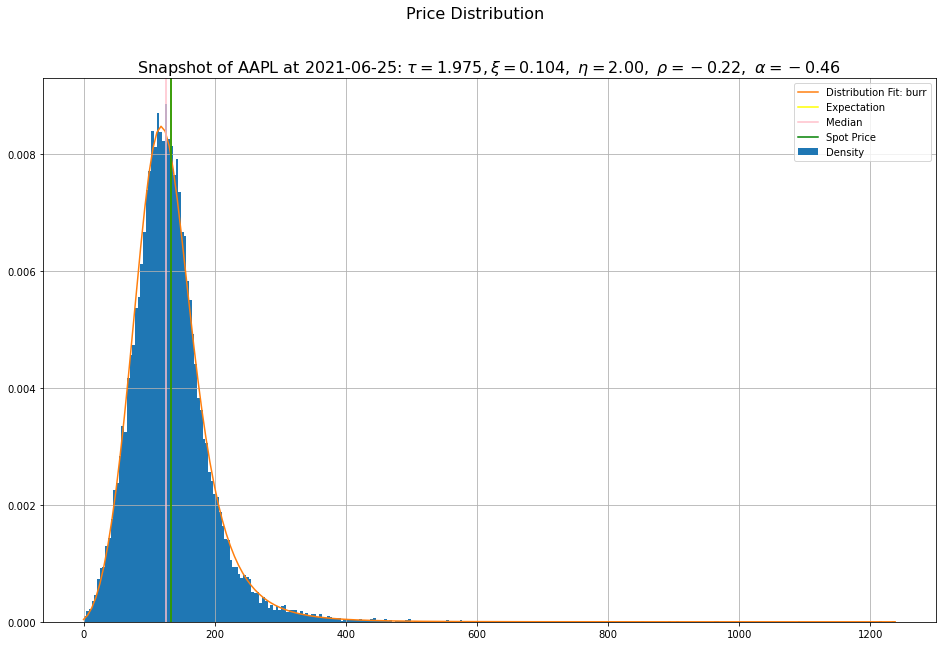

In [115]:
plt.figure(figsize=(16,10))

plt.hist(ST, bins=300, density=True, label="Density")
plt.plot(x,y_best, label="Distribution Fit: {}".format(best_dist.name))
plt.axvline(x = np.mean(ST), color="yellow", label="Expectation") 
plt.axvline(x = np.median(ST), color="pink", label="Median")
plt.axvline(x = spot, color="green", label="Spot Price")
plt.suptitle("Price Distribution", fontsize=16)
title = r'Snapshot of {} at {}: $ \tau=%.3f, \xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'.format(ticker, date_str)
plt.title(title%(texp, rB.xi, rB.eta, rB.rho, rB.a), fontsize=16)
plt.grid()
plt.legend()
plt.show()

In [116]:
prob_moneyness_df = pd.DataFrame(index=strikes)
cdf_strikes = best_dist.cdf(strikes, loc=loc_best,scale=scale_best, *arg_best)
prob_moneyness_df["Probability of Moneyness in %"] = np.round((1-cdf_strikes)*100,2)
print(r"Probability of Moneyness for each given Strike and Maturity {} years".format(texp))
prob_moneyness_df

Probability of Moneyness for each given Strike and Maturity 1.975 years


,Probability of Moneyness in %
60.0,93.10
65.0,91.33
70.0,89.29
75.0,86.95
80.0,84.32
85.0,81.39
90.0,78.17
95.0,74.69
100.0,70.96
105.0,67.02


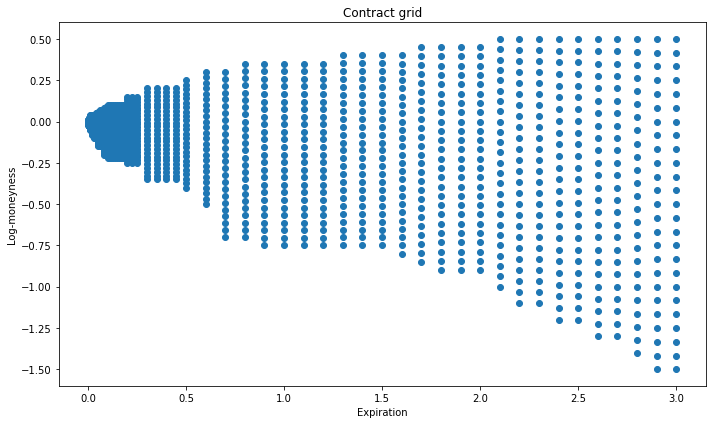

Original number of observations:  35
After filtering: 30


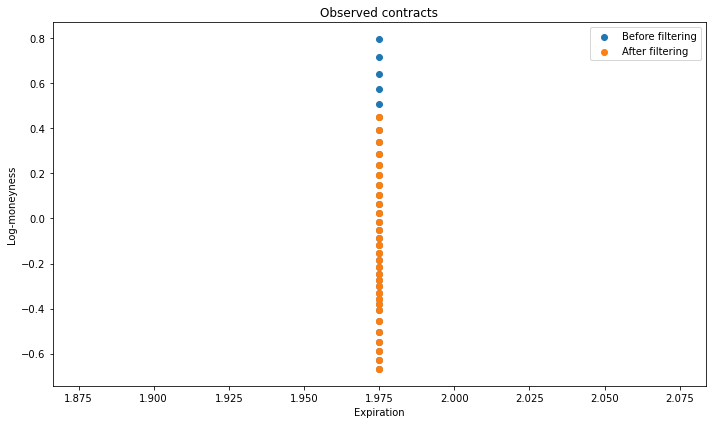

ValueError: operands could not be broadcast together with shapes (23,) () (30,) (1,) (1,) 

In [163]:
import NeuralNetworkPricing as nnp
weights_folder = path_folder + "\\roemer_weights_rbergomi"
contracts_folder = path_folder + "\\roemer_contracts"


# Define neural network based (rough Bergomi) model:
model = nnp.NeuralNetworkPricer(contracts_folder,weights_folder,"rbergomi")

# Plot the neural network contract grid:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.scatter(model.T,model.k)
plt.title("Contract grid")
plt.xlabel("Expiration")
plt.ylabel("Log-moneyness")
plt.tight_layout()
plt.show()

### Importing True Data
#######################

# Calculating Mid Prices from True Data
#mid= (df["Ask"].values + df["Bid"].values)/2
# Calculating Log Moneyness
#lm = np.log(spot/df["Strike"].values)
# Calculating Time Value
#from datetime import date
#d_end = date(2023, 6, 16)
#d_start = date(2021, 6, 25)
#t_years = (d_end - d_start).days / 365
# Vector of expiration times, length equal to length of moneyness
ttexp = np.ones(len(lm)) * texp


# Load example contracts:
k_orig = np.transpose([lm])# tmp[:,0].reshape(-1,1)
T_orig = np.transpose([ttexp])# tmp[:,1].reshape(-1,1)

# Filter contracts that are not within the neural network domain:
idxKeep = model.AreContractsInDomain(k_orig,T_orig)
k_obs = k_orig[idxKeep,:]
T_obs = T_orig[idxKeep,:]
mid_obs = mid[idxKeep[:28]]
print("Original number of observations: ",len(k_orig))
print("After filtering:",len(k_obs))

# Plot contracts before and after filtering:
plt.figure(figsize=(10, 6))
plt.scatter(T_orig,k_orig,label="Before filtering")
plt.scatter(T_obs,k_obs,label="After filtering")
plt.title("Observed contracts")
plt.xlabel("Expiration")
plt.ylabel("Log-moneyness")
plt.legend()
plt.tight_layout()
plt.show()



# Parameters as in Benessen
H_roemer = a_2 + 1/2
eta_roemer = eta_2
rho_roemer = rho_2
xi_roemer = xi_2/ 0.323
parTrue = np.append(np.array([H_roemer,eta_roemer,rho_roemer]),(pow(xi_roemer,2))*np.ones((1,27))).reshape(30,1)

# Calculating Implied Volatilites via Black Scholes, as TRUE Implied Volatilities
#list of strikes after filtering
strikes_new = spot/np.exp(k_obs)
iv_obs = vec_bsinv(mid_obs,spot,np.squeeze(strikes_new),T_obs[0], disc_rate)
iv_obs = np.transpose([iv_obs])

# Calibrate the model to see if we can recover the parameters:
# Remark: We simplify by forcing the forward variance curve flat. This also avoids an overparameterised model.
from scipy.optimize import minimize

# Set parameter bounds:
# Remark: Optimizer occassionally goes beyond the specified bounds. Thus we make the bounds slightly more narrow.
bounds = []
eps = pow(10,-6) 
for i in range(0,len(model.lb)):
    bounds.append([model.lb[i]+eps,model.ub[i]-eps])
    
# Fix the forward variance curve flat:
bounds = bounds[0:4]
idxConvPar = np.concatenate((np.array([0,1,2]),3*np.ones(27))).astype(int)
par0 = np.array([0.2,1.6,-0.7,pow(0.25,2)])

# Define the error function:
def err_fun(parEval):
    return(np.sum(pow(iv_obs - model.Eval(parEval[idxConvPar].reshape(-1,1),k_obs,T_obs),2)))

# Optimize:
res = minimize(err_fun,par0,method='L-BFGS-B',bounds=np.squeeze(bounds)) #minimize(err_fun,par0,method='L-BFGS-B',bounds=bounds)
print("Optimisation message: ", res.message)
parCalib = res.x[idxConvPar].reshape(-1,1)

# Compare calibrated and true parameters:
print("[True , Calibrated]: ")
np.concatenate((parTrue,parCalib),1)

In [164]:
strikes_new

array([[ 85.],
       [ 90.],
       [ 95.],
       [100.],
       [105.],
       [110.],
       [115.],
       [120.],
       [125.],
       [130.],
       [135.],
       [140.],
       [145.],
       [150.],
       [155.],
       [160.],
       [165.],
       [170.],
       [175.],
       [180.],
       [185.],
       [190.],
       [195.],
       [200.],
       [210.],
       [220.],
       [230.],
       [240.],
       [250.],
       [260.]])

In [162]:
len(idxKeep[:28]), len(mid)

(28, 28)

In [154]:
##### Plot the fit:
iv_fit = model.Eval(parCalib,k_obs,T_obs)

uniqT = np.unique(T_obs)
npts = 25
plt.figure(1,figsize=(14,12))
j = -1
iList = np.arange(0,len(uniqT))
for i in iList:
    j = j + 1
    plt.subplot(4,4,j+1)
    idxT = T_obs == uniqT[i]
    plt.plot(k_obs[idxT],iv_obs[idxT],'b',label='Observed')
    plt.plot(k_obs[idxT],iv_fit[idxT],'--r',label='Fit')
    plt.title("Maturity=%1.3f "%uniqT[i])
    plt.xlabel("Log-moneyness")
    plt.ylabel("Implied volatility")
    plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'parCalib' is not defined

Text(0.12, -0.045, ' The observed Black Scholes Implied Volatility for AAPL with 1.975 years to Maturity, VS. the Bennedsen Fit (manually calibrated), VS. the \n Neural Network (NN) Fit for Strike, Log Strike and Log Moneyness. The NN Slice highlights the limitations of the NN employed by Roemer, \n as it can only calibrate within its predefined domain.')

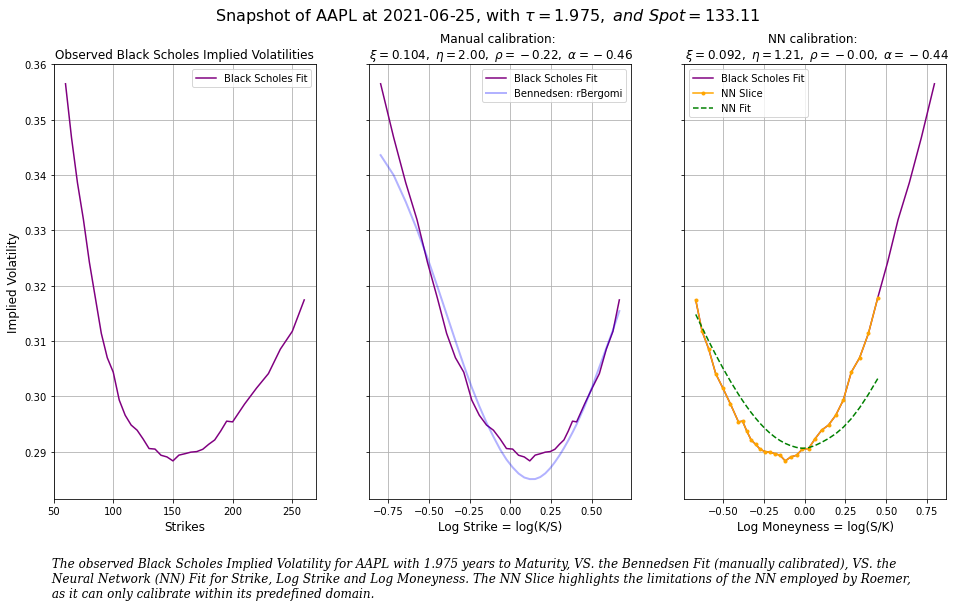

In [119]:
# Plotting Black Scholes Volatility Skew

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8),
                             sharey=True)

ax1.plot(strikes, implied_vols_orig_data, c="purple", label="Black Scholes Fit")
ax1.legend()

ax2.plot(k_logstrike, implied_vols_orig_data, c="purple", label="Black Scholes Fit")
ax2.plot(k_logstrike,implied_vols_ben_theor, lw=2, alpha=0.3, c="blue", label="Bennedsen: rBergomi")
ax2.legend()

ax3.plot(lm, implied_vols_orig_data, c="purple", label="Black Scholes Fit")
ax3.plot(k_obs, iv_obs, ".-", c="orange", label="NN Slice")
ax3.plot(k_obs[idxT],iv_fit[idxT],'--g',label='NN Fit')
ax3.legend()

ax1.grid()
ax2.grid()
ax3.grid()

ax1.set_title('Observed Black Scholes Implied Volatilities')
title_ax2 = "Manual calibration: \n " + r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'
ax2.set_title(title_ax2%(rB.xi, rB.eta, rB.rho, rB.a), fontsize=12)
title_ax3 = "NN calibration: \n " + r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'
ax3.set_title(title_ax3%(parCalib[3], parCalib[1], parCalib[2], parCalib[0]-1/2), fontsize=12)

ax1.set_xlabel("Strikes", fontsize=12)
ax2.set_xlabel("Log Strike = log(K/S)", fontsize=12)
ax3.set_xlabel("Log Moneyness = log(S/K)", fontsize=12)
ax1.set_ylabel("Implied Volatility", fontsize=12)

title = r' Snapshot of {} at {}, with $ \tau=%.3f, \ and \ Spot=%.2f $'.format(ticker, date_str)
plt.suptitle(title%(texp, spot), fontsize=16)

f.text(0.12, -0.045, ' The observed Black Scholes Implied Volatility for {} with {} years to Maturity, VS. the Bennedsen Fit (manually calibrated), VS. the \n Neural Network (NN) Fit for Strike, Log Strike and Log Moneyness. The NN Slice highlights the limitations of the NN employed by Roemer, \n as it can only calibrate within its predefined domain.'.format(ticker, texp), ha='left', fontsize=12, fontstyle="italic", fontfamily="serif")

In [ ]:
len(strikes)

In [120]:
file_name =  "optionsData_AAPL_2021-06-25.pkl" #"optionsData_AAPL_2021-05-05.pkl"#input("Choose File Name from directory, including file extension: \n")

file_to_read = open(file_name, "rb")
loaded_dictionary = pickle.load(file_to_read)

lm_index = np.round(np.flip(np.arange(-2.5,3,0.001)),3)

df_imp_vols = pd.DataFrame(index=lm_index)
df_imp_vols_theor=pd.DataFrame(index=lm_index)

for key, v in loaded_dictionary.items():

    selected_date = key #input("Copy/Paste Desired Date from above \n")
    selected_option_type = "calls"#input("Calls or Puts \n")

    df_key = loaded_dictionary[selected_date][selected_option_type]
    
    
    # Getting Mid and Strikes
    mid = ((df_key["Ask"] + df_key["Bid"])/2).values
    strikes = df_key["Strike"].values
    lm = np.round(np.log(spot/strikes),3)
    


    # Time of File
    date_str = file_name[17:-4]
    str_format1 = "%Y-%m-%d"
    t_datetime = datetime.strptime(date_str, str_format1)

    # Time To Expiration
    str_format2 = "%B %d, %Y"
    exp_datetime = datetime.strptime(key, str_format2)

    # Calculating Time to Expiration in Years
    totsec = (exp_datetime - t_datetime).total_seconds()
    years = totsec / 3600 / 24 / 365
    texp = np.round(years, 3)

    # Calculating implied vola
    
    try:
        impvol_test = vec_bsinv(mid, spot, strikes, texp, disc_rate)
    except Exception as e:
        impvol_test = []
        for i, val in enumerate(mid):

            try:
                impvol_test.append(vec_bsinv(val, spot, strikes[i], texp, disc_rate))
            except Exception as e:
                impvol_test.append(1.e-19)

    for i, val in enumerate(lm):
        df_imp_vols.loc[val, texp] = impvol_test[i]
    #df_imp_vols[key] = impvol_test
    
    
    
    # Defining Parameters for Fractional Brownian Process
    # 26.06.2021
    a_2 = -0.46
    rho_2 = -0.22
    xi_2 = 0.323**2
    eta_2 = 2

    # to ensure computation works, we have to give greater granularity for very short durations.
    # However, setting finer granularity affects shape of smile significantly. What is the explanation?
    if texp < 0.01:
        steps_year = 100000
    else:
        steps_year = 100

    # Defining the Fractional Brownian Process and Resulting Price Process
    np.random.seed(4)
    rB = rBergomi(n = steps_year, N = 30000, T = texp, a = a_2)
    dW1 = rB.dW1()
    dW2 = rB.dW2()
    Y = rB.Y(dW1)
    dB = rB.dB(dW1, dW2, rho = rho_2)
    V = rB.V(Y, xi = xi_2, eta = eta_2)
    S = rB.S(V, dB)

    # rBergomi Implied Volatilities and Call Prices
    ST = S[:,-1][:,np.newaxis]
    ST = ST*spot
    K = strikes #(np.exp(k)*spot)[np.newaxis,:]
    call_payoffs = np.maximum(ST - K,0)
    call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
    #implied_vols_ben_theor = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T, disc_rate)
    
    
    try:
        implied_vols_ben_theor = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T, disc_rate)
    except Exception as e:
        implied_vols_ben_theor = []
        for i, val in enumerate(np.squeeze(call_prices)):

            try:
                implied_vols_ben_theor.append(vec_bsinv(val, spot, np.transpose([K])[i], rB.T, disc_rate))
            except Exception as e:
                implied_vols_ben_theor.append(1.e-19)
    print(texp)
    
    
    
    
    
    #testdf_2 = pd.DataFrame(index=lm)
    #testdf_2[texp] = implied_vols_ben_theor
    #display(testdf_2.head())
    #df_imp_vols_theor = pd.concat([df_imp_vols_theor, testdf_2])
    #display(df_imp_vols_theor.head())
    #if lm.size == 0:
    #    print("empty for", texp)
    for i, val in enumerate(lm):
        df_imp_vols_theor.loc[val, texp] = np.squeeze(implied_vols_ben_theor)[i]
    #df_imp_vols[key] = impvol_test
    #ar = np.append(ar, implied_vols_ben_theor)
    



0.019
0.038
0.058
0.077
0.096
0.153
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a) and f(b) must have different signs
f(a)

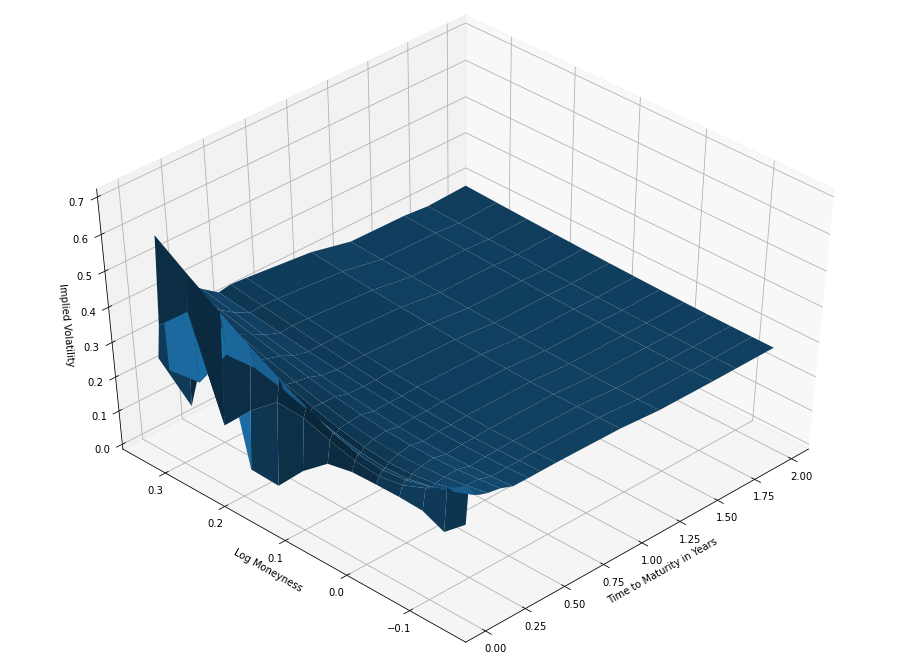

In [124]:
dftest2_theor = df_imp_vols_theor.dropna(how="any")# df_imp_vols_theor.replace(1.000000e-19, 0.4).dropna(how="any")

# Instantiate Plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30., azim=45)

# Assign Values to Axes
X1 = dftest2_theor.columns.values
Y1 = dftest2_theor.index.values
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = dftest2_theor.values.astype(dtype=np.float64) #np.sin(R)

# Plot ImpVolSurface
#my_col = cm.jet(Z1/np.amax(Z1))
ax.plot_surface(X1, Y1, Z1)
max_vol = np.max(np.max(dftest2_theor))
ax.set_zlim(0., max_vol*1.2)
ax.set_xlabel("Time to Maturity in Years")
ax.set_ylabel("Log Moneyness")
ax.set_zlabel('Implied Volatility')
ax.view_init(45, 225)
#plt.title("{}".format(option_contract_df[0]))

plt.show()

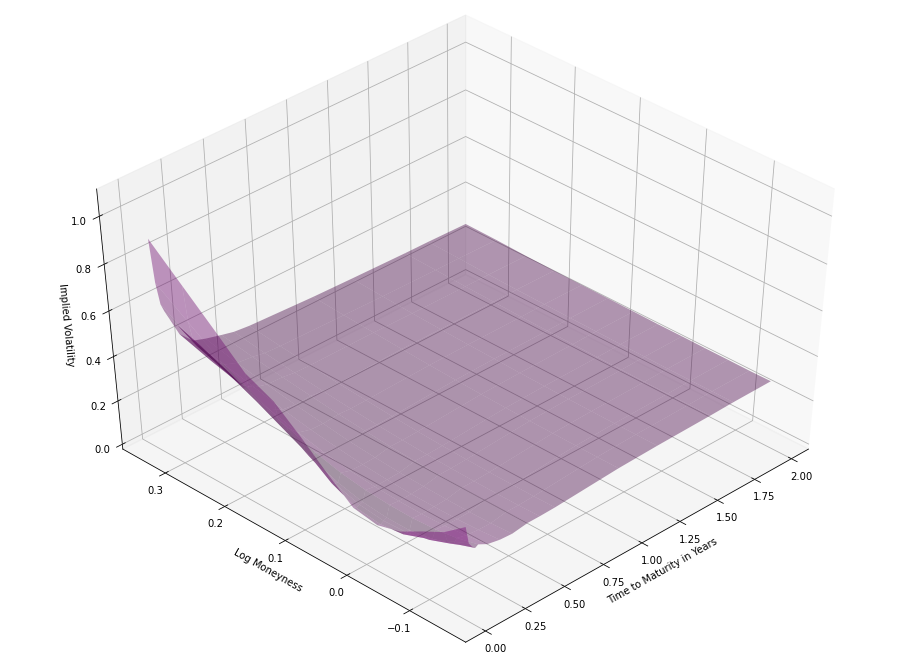

In [130]:
dftest2 = df_imp_vols.dropna(how="any")

# Instantiate Plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30., azim=45)

# Assign Values to Axes
X = dftest2.columns.values
Y = dftest2.index.values
X, Y = np.meshgrid(X, Y)
Z = dftest2.values.astype(dtype=np.float64) #np.sin(R)

# Plot ImpVolSurface
#my_col = cm.jet(Z/np.amax(Z))
ax.plot_surface(X, Y, Z, alpha=0.4, color="purple")
#ax.plot_surface(X1, Y1, Z1, color="yellow", rstride=1, cstride=1, edgecolors='k', lw=0.5, alpha=0.1)
max_vol = np.max(np.max(dftest2))
ax.set_zlim(0., max_vol*1.2)
ax.set_xlabel("Time to Maturity in Years")
ax.set_ylabel("Log Moneyness")
ax.set_zlabel('Implied Volatility')
ax.view_init(45, 225)
#plt.title("{}".format(option_contract_df[0]))

plt.show()

## Next Steps:


extrapolate one option chain (one maturity) until expiration and compare vol surfaces

understand NN: What do we do in calibration? Why/How do we calibrate to market data? Suspisicon: We jsut try to match what is already observable. Why do we do that? Why cant we just then take whats already observed?

Is rBergomi then really to find fair market prices or is its purpose to just match market data?

Try vol Surface with NN

Read into other NN by B. Hovarth






In [ ]:
#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----

In [ ]:
# Old from other file

# Getting Option Data
#ticker = "AAPL"
#expiration_dates = get_expiration_dates(ticker)
#expdate = expiration_dates[-1]
#options_chain = get_options_chain(ticker, date=expdate)
#strikes = options_chain["calls"]["Strike"].values
#strikes = np.flip(strikes)
spot = 133.11 # 25.6.2021

# Calculating time at date of file

# Calculating current Time in New York
#nyc_datetime_now = datetime.now(pytz.timezone('US/Eastern'))
#nyc_datetime_now = nyc_datetime_now.replace(tzinfo=None, microsecond=0, second=0)
#print("Date in NYC", nyc_datetime_now )

# Calculating Datetime of Expiration Date
#dtformat = "%B %d, %Y"
#expdate_datetime = datetime.strptime(expdate, dtformat)
#expdate_datetime = expdate_datetime + timedelta(hours=16)
#print("Exp Date", expdate_datetime)


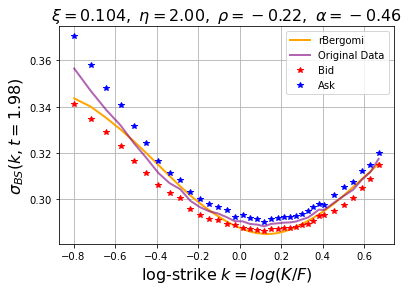

In [126]:
################################################################################
     # BENEDSSEN - Vol Surface Construction: Extrapolating one Maturity #
################################################################################

# Standard Parameters
#T = 1.0
#a = -0.43
#rho = -0.9
#xi = 0.235**2
#eta = 1.9


# Defining Parameters for Fractional Brownian Process
# 26.06.2021
a_2 = -0.46
rho_2 = -0.22
xi_2 = 0.323**2
eta_2 = 2

# 05.05.2021
#a_2 = -0.465
#rho_2 = -0.105
#xi_2 = 0.327**2
#eta_2 = 1.87


# to ensure computation works, we have to give greater granularity for very short durations.
# However, setting finer granularity affects shape of smile significantly. What is the explanation?
if texp < 0.01:
    steps_year = 100000
else:
    steps_year = 100

# Defining the Fractional Brownian Process and Resulting Price Process
np.random.seed(4)
rB = rBergomi(n = steps_year, N = 30000, T = texp, a = a_2)
dW1 = rB.dW1()
dW2 = rB.dW2()
Y = rB.Y(dW1)
dB = rB.dB(dW1, dW2, rho = rho_2)
V = rB.V(Y, xi = xi_2, eta = eta_2)
S = rB.S(V, dB)

# rBergomi Implied Volatilities and Call Prices
ST = S[:,-1][:,np.newaxis]
ST = ST*spot
K = strikes #(np.exp(k)*spot)[np.newaxis,:]
call_payoffs = np.maximum(ST - K,0)
call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
implied_vols_ben_theor = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T, disc_rate)

# True Data
bid_iv_array = vec_bsinv(df["Bid"].values, spot, df["Strike"].values, rB.T, disc_rate)
ask_iv_array = vec_bsinv(df["Ask"].values, spot, df["Strike"].values, rB.T, disc_rate)

# Graphing
plot, axes = plt.subplots()
axes.plot(k_logstrike,implied_vols_ben_theor, lw=2, c="orange", label="rBergomi")
axes.plot(k_logstrike, implied_vols_orig_data, lw=2, alpha=0.6, c="purple", label="Original Data")
axes.plot(k_logstrike,bid_iv_array, "*", c="r", label = "Bid")
axes.plot(k_logstrike,ask_iv_array, "*", c="b", label="Ask")
#axes.plot(k_obs[idxT],iv_fit[idxT],'--g',label='Fit')
axes.legend()
axes.set_xlabel(r'log-strike $k=log(K/F)$', fontsize=16)
axes.set_ylabel(r'$\sigma_{BS}(k,t=%.2f)$'%rB.T, fontsize=16)
title = r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'
axes.set_title(title%(rB.xi, rB.eta, rB.rho, rB.a), fontsize=16)
plt.grid(True)

In [127]:
# Defining Parameters for Fractional Brownian Process
# 26.06.2021
a_2 = -0.46
rho_2 = -0.22
xi_2 = 0.323**2
eta_2 = 2

extra_iv_df = pd.DataFrame(index=strikes)

for i, tau in enumerate(np.arange(0.01, texp, 0.05)):
    
    if texp < 0.01:
        steps_year = 100000
    else:
        steps_year = 100

    # Defining the Fractional Brownian Process and Resulting Price Process
    np.random.seed(4)
    rB = rBergomi(n = steps_year, N = 30000, T = tau, a = a_2)
    dW1 = rB.dW1()
    dW2 = rB.dW2()
    Y = rB.Y(dW1)
    dB = rB.dB(dW1, dW2, rho = rho_2)
    V = rB.V(Y, xi = xi_2, eta = eta_2)
    S = rB.S(V, dB)
    
    # rBergomi Implied Volatilities and Call Prices
    ST = S[:,-1][:,np.newaxis]
    ST = ST*spot
    K = strikes #(np.exp(k)*spot)[np.newaxis,:]
    call_payoffs = np.maximum(ST - K,0)
    call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
    implied_vols_ben_extra = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T, disc_rate)
    extra_iv_df[tau] = implied_vols_ben_extra

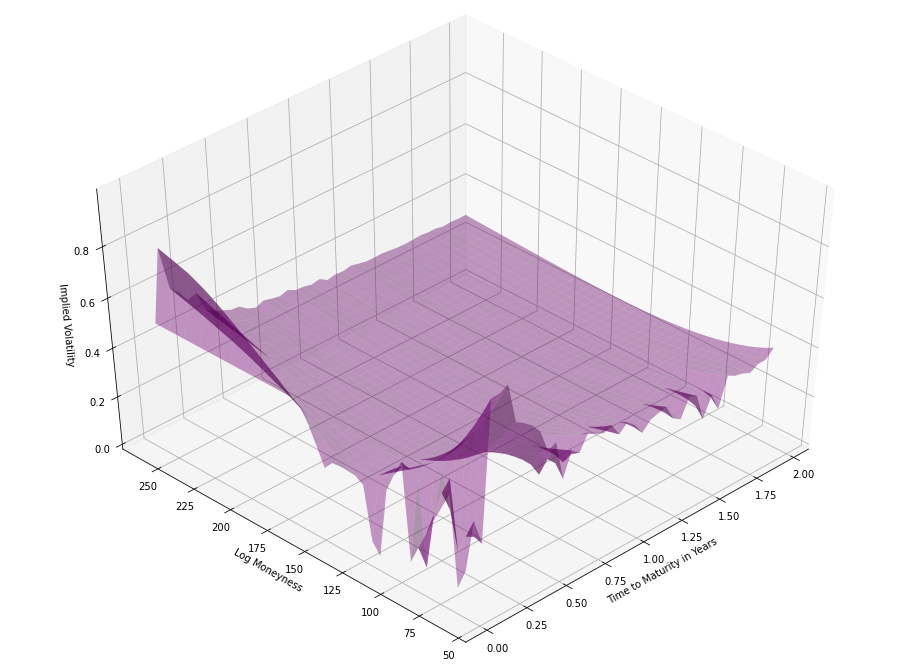

In [128]:
# Instantiate Plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30., azim=45)

# Assign Values to Axes
X2 = extra_iv_df.columns.values
Y2 = extra_iv_df.index.values
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = extra_iv_df.values.astype(dtype=np.float64) #np.sin(R)

# Plot ImpVolSurface
#my_col = cm.jet(Z/np.amax(Z))
ax.plot_surface(X2, Y2, Z2, alpha=0.4, color="purple")
#ax.plot_surface(X1, Y1, Z1, color="yellow", rstride=1, cstride=1, edgecolors='k', lw=0.5, alpha=0.1)
max_vol = np.max(np.max(extra_iv_df))
ax.set_zlim(0., max_vol*1.2)
ax.set_xlabel("Time to Maturity in Years")
ax.set_ylabel("Log Moneyness")
ax.set_zlabel('Implied Volatility')
ax.view_init(45, 225)
#plt.title("{}".format(option_contract_df[0]))

plt.show()

In [38]:
def rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi):
    
    # to ensure computation works, we have to give greater granularity for very short durations.
    # However, setting finer granularity affects shape of smile significantly. What is the explanation?
    if texp < 0.01:
        steps_year = 100000
    else:
        steps_year = 100

    # Defining the Fractional Brownian Process and Resulting Price Process
    np.random.seed(4)
    rB = rBergomi(n = steps_year, N = 30000, T = texp, a = alpha)
    dW1 = rB.dW1()
    dW2 = rB.dW2()
    Y = rB.Y(dW1)
    dB = rB.dB(dW1, dW2, rho = rho)
    V = rB.V(Y, xi = xi, eta = eta)
    S = rB.S(V, dB)
    
    # rBergomi Implied Volatilities and Call Prices
    ST = S[:,-1][:,np.newaxis]
    ST = ST*spot
    K = np.exp(strikes) #(np.exp(k)*spot)[np.newaxis,:]
    call_payoffs = np.maximum(ST - K,0)
    call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
    implied_vols_ben_theor = vec_bsinv(call_prices, spot, np.transpose([K]), rB.T)
    
    return implied_vols_ben_theor, call_prices


spot=1.
strikes = np.arange(-2.5,2.5,0.1)
texp = 3
alpha = -0.35
eta = 2.5
rho = -0.7
xi = 0.15
ivs, c0 = rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi)

In [109]:
texp_list = np.arange(0.002,3,0.1)
df_ivs = pd.DataFrame(columns=np.flip(texp_list), index=strikes)
df_ivs.head()

,2.902,2.802,2.702,2.602,2.502,2.402,2.302,2.202,2.102,2.002,...,0.902,0.802,0.702,0.602,0.502,0.402,0.302,0.202,0.102,0.002
-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
spot=1.
strikes = np.arange(-2.5,2.5,0.1)
alpha = -0.35
eta = 2.5
rho = -0.7
xi = 0.15

for i, texp in enumerate(df_ivs.columns.values):
    
    ivs, c0 = rbergomi_s(spot, strikes, texp, alpha, eta, rho, xi)
    ivs = np.squeeze(ivs)
    ivs[ivs==1.e-19] = np.nan
    df_ivs[texp] = ivs

<ipython-input-111-17df40e4bfcf>:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, alpha=0.9)


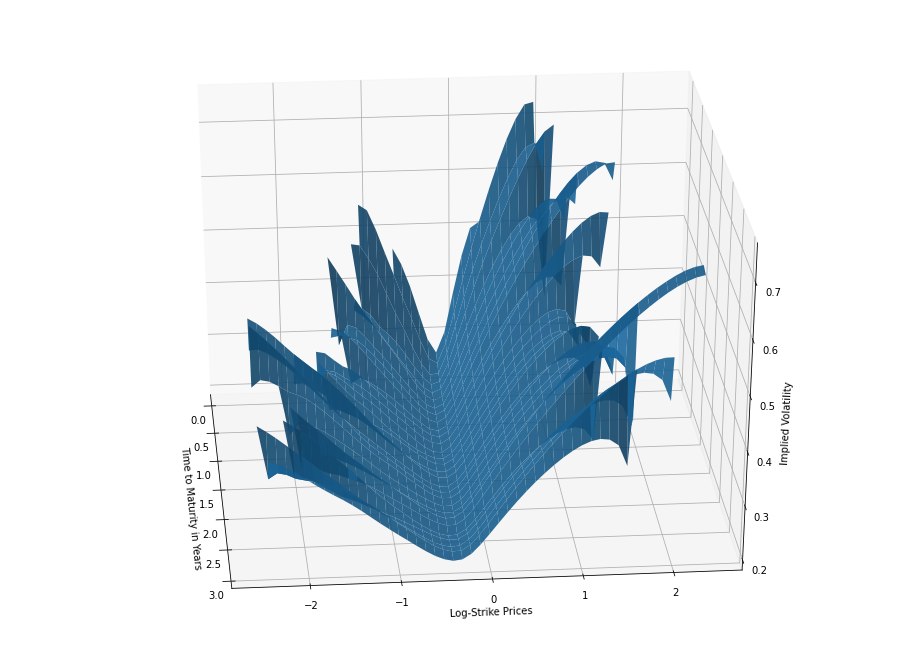

In [111]:

# Instantiate Plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30., azim=-5)

# Assign Values to Axes
X = df_ivs.columns.values
Y = strikes #df_ivs.index.values
Y= np.flip(Y)
X, Y = np.meshgrid(X, Y)
Z = df_ivs.values.astype(dtype=np.float64) #np.sin(R)

# Plot ImpVolSurface
ax.plot_surface(X, Y, Z, alpha=0.9)
#max_vol = np.max(np.max(df_ivs))
#ax.set_zlim(0., max_vol*1.2)
ax.set_xlabel("Time to Maturity in Years")
ax.set_ylabel("Log-Strike Prices")
ax.set_zlabel('Implied Volatility')
#plt.title("{}".format(option_contract_df[0]))
plt.show()

In [141]:
df_new =df_ivs[(df_ivs.index>-.6)&(df_ivs.index<1.2)]

<ipython-input-142-5aeb2caf5242>:15: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, alpha=0.9)


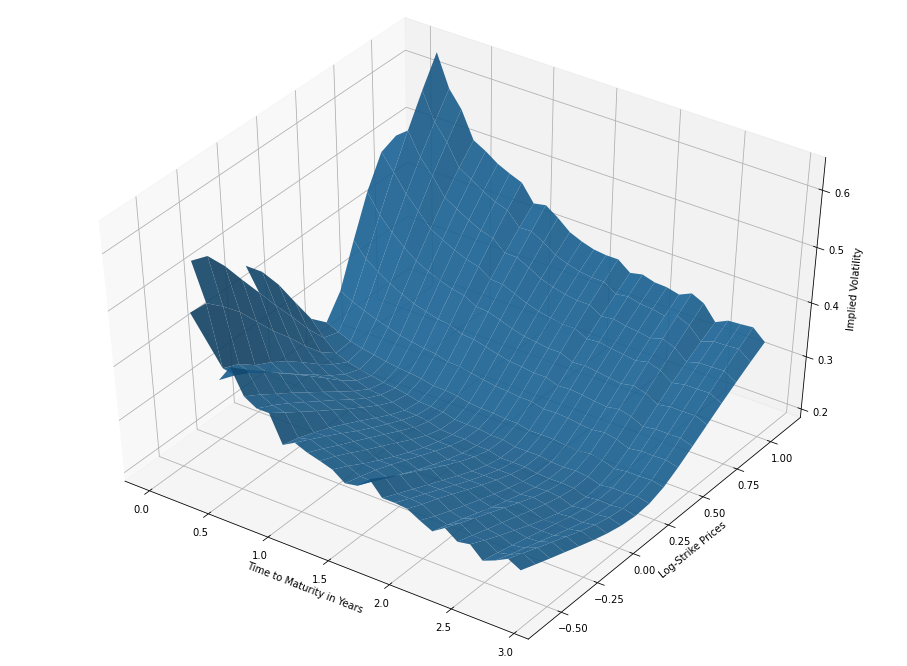

In [142]:
df = df_new
# Instantiate Plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45., azim=-55)

# Assign Values to Axes
X = df.columns.values
Y = df.index #df_ivs.index.values
Y= np.flip(Y)
X, Y = np.meshgrid(X, Y)
Z = df.values.astype(dtype=np.float64) #np.sin(R)

# Plot ImpVolSurface
ax.plot_surface(X, Y, Z, alpha=0.9)
#max_vol = np.max(np.max(df_ivs))
#ax.set_zlim(0., max_vol*1.2)
ax.set_xlabel("Time to Maturity in Years")
ax.set_ylabel("Log-Strike Prices")
ax.set_zlabel('Implied Volatility')
#plt.title("{}".format(option_contract_df[0]))
plt.show()

In [40]:
ivs[0]

array([1.e-19])

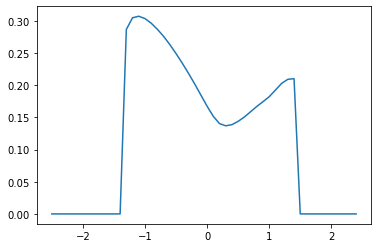

In [39]:
plt.plot(strikes, ivs)

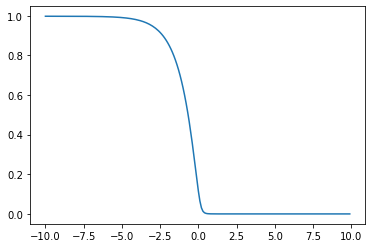

In [32]:
plt.plot(strikes, c0)